# Playground Series - Season 3, Episode 14
Prediction of Wild Blueberry Yield

In [1]:
import os, gc
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

TRAIN_PATH = r"../berry_yield/playground-series-s3e14/train.csv"
SAMPLE_PATH = r"../berry_yield/playground-series-s3e14/test.csv"
SEED = 42

train_df = pd.read_csv(TRAIN_PATH, index_col="id")
sample_df = pd.read_csv(SAMPLE_PATH, index_col="id")

TARGET_COL = "yield"

pd.set_option('display.max_rows', 50)
np.random.seed(SEED)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# EDA
## Features Description

- Clonesize (m2):           The average blueberry clone size in the field
- Honeybee (bees/m2/min):   Honeybee density in the field
- Bumbles (bees/m2/min):    Bumblebee density in the field
- Andrena (bees/m2/min):    Andrena bee density in the field
- Osmia (bees/m2/min):      Osmia bee density in the field
- MaxOfUpperTRange(℉):     The highest record of the upper band daily air temperature during the bloom season
- MinOfUpperTRange (℉):     The lowest record of the upper band daily air temperature
- AverageOfUpperTRange (℉): The average of the upper band daily air temperature
- MaxOfLowerTRange (℉):     The highest record of the lower band daily air temperature
- MinOfLowerTRange (℉):     The lowest record of the lower band daily air temperature
- AverageOfLowerTRange (℉): The average of the lower band daily air temperature
- RainingDays (Day):        The total number of days during the bloom season, each of which has precipitation larger than zero
- AverageRainingDays (Day): The average of raining days of the entire bloom season

## Descriptive Statistics

In [2]:
train_df.head(10)

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
id,,,,,,,,,,,,,,,,,
0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417
5,25.0,0.50,0.25,0.63,0.75,94.6,57.2,79.0,68.2,33.0,55.9,34.0,0.56,0.565239,0.484350,40.555019,7267.28344
6,12.5,0.25,0.38,0.50,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.498730,0.442193,35.517539,5739.68029
7,12.5,0.25,0.25,0.75,0.75,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.619888,0.529502,42.191013,7920.06175
8,25.0,0.50,0.38,0.38,0.75,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.532557,0.465367,36.166044,6465.37205


In [3]:
print("--- Quick overview ---\n")

print("Shapes:")
print(f"  train  -> {train_df.shape}")
print(f"  sample -> {sample_df.shape}\n")

print("Missing values:")
print(f"  train  -> {train_df.isna().any(axis=None)}")
print(f"  sample -> {sample_df.isna().any(axis=None)}\n")

print("Duplicates:")
print(f"  {train_df.duplicated().sum()} duplicate rows")
print(f"  {sample_df.duplicated().sum()} duplicate rows\n")

print(f"Number of classes: {len(train_df[TARGET_COL].unique())}")

--- Quick overview ---

Shapes:
  train  -> (15289, 17)
  sample -> (10194, 16)

Missing values:
  train  -> False
  sample -> False

Duplicates:
  7 duplicate rows
  3 duplicate rows

Number of classes: 776


In [4]:
desc = train_df.describe().T
desc['nunique'] = train_df.nunique()
desc['%unique'] = desc['nunique'] / len(train_df) * 100
desc['null'] = train_df.isna().sum()
desc['type'] = train_df.dtypes

print("Train description")
desc

Train description


,count,mean,std,min,25%,50%,75%,max,nunique,%unique,null,type
clonesize,15289.0,19.704690,6.595211,10.000000,12.500000,25.000000,25.000000,40.000000,6,0.039244,0,float64
honeybee,15289.0,0.389314,0.361643,0.000000,0.250000,0.500000,0.500000,18.430000,7,0.045785,0,float64
bumbles,15289.0,0.286768,0.059917,0.000000,0.250000,0.250000,0.380000,0.585000,11,0.071947,0,float64
andrena,15289.0,0.492675,0.148115,0.000000,0.380000,0.500000,0.630000,0.750000,16,0.104650,0,float64
osmia,15289.0,0.592355,0.139489,0.000000,0.500000,0.630000,0.750000,0.750000,14,0.091569,0,float64
MaxOfUpperTRange,15289.0,82.169887,9.146703,69.700000,77.400000,86.000000,86.000000,94.600000,6,0.039244,0,float64
MinOfUpperTRange,15289.0,49.673281,5.546405,39.000000,46.800000,52.000000,52.000000,57.200000,5,0.032703,0,float64
AverageOfUpperTRange,15289.0,68.656256,7.641807,58.200000,64.700000,71.900000,71.900000,79.000000,5,0.032703,0,float64
MaxOfLowerTRange,15289.0,59.229538,6.610640,50.200000,55.800000,62.000000,62.000000,68.200000,6,0.039244,0,float64
MinOfLowerTRange,15289.0,28.660553,3.195367,24.300000,27.000000,30.000000,30.000000,33.000000,7,0.045785,0,float64


In [5]:
desc = sample_df.describe().T
desc["nunique"] = sample_df.nunique()
desc["%unique"] = desc['nunique'] / len(sample_df) * 100
desc['null'] = sample_df.isna().sum()
desc['type'] = sample_df.dtypes

print("Sample description")
desc

Sample description


,count,mean,std,min,25%,50%,75%,max,nunique,%unique,null,type
clonesize,10194.0,19.795958,6.591864,10.000000,12.500000,25.000000,25.000000,37.500000,5,0.049048,0,float64
honeybee,10194.0,0.391606,0.390022,0.000000,0.250000,0.500000,0.500000,18.430000,7,0.068668,0,float64
bumbles,10194.0,0.286307,0.059867,0.000000,0.250000,0.250000,0.380000,0.585000,8,0.078478,0,float64
andrena,10194.0,0.491328,0.148166,0.000000,0.380000,0.500000,0.630000,0.750000,12,0.117716,0,float64
osmia,10194.0,0.593222,0.139897,0.000000,0.500000,0.630000,0.750000,0.750000,14,0.137336,0,float64
MaxOfUpperTRange,10194.0,82.207014,9.153442,69.700000,77.400000,86.000000,86.000000,94.600000,7,0.068668,0,float64
MinOfUpperTRange,10194.0,49.697204,5.552286,39.000000,46.800000,52.000000,52.000000,57.200000,6,0.058858,0,float64
AverageOfUpperTRange,10194.0,68.687816,7.647629,58.200000,64.700000,71.900000,71.900000,79.000000,6,0.058858,0,float64
MaxOfLowerTRange,10194.0,59.256465,6.617055,50.200000,55.800000,62.000000,62.000000,68.200000,5,0.049048,0,float64
MinOfLowerTRange,10194.0,28.674779,3.198282,24.300000,27.000000,30.000000,30.000000,33.000000,5,0.049048,0,float64


In [6]:
del desc

## Adversarial Validation

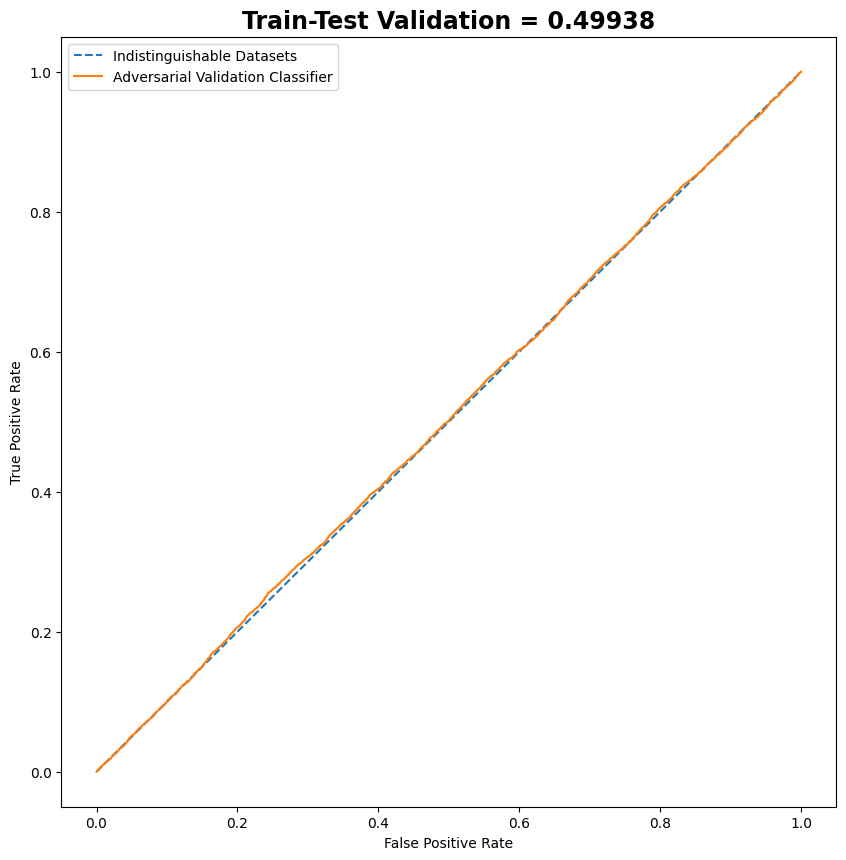

In [7]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, roc_curve

def adversarial_validation():
    adv_train = train_df.drop(TARGET_COL, axis=1)
    
    adv_test = sample_df.copy()

    adv_train['is_test'] = 0
    adv_test['is_test'] = 1

    adv = pd.concat([adv_train, adv_test], ignore_index=True)

    adv_shuffled = adv.sample(frac=1)

    adv_X = adv_shuffled.drop('is_test', axis=1)
    adv_y = adv_shuffled.is_test

    skf = StratifiedKFold(n_splits=5, random_state=SEED, shuffle = True)

    val_scores = []
    predictions = np.zeros(len(adv))

    for _,(train_idx, val_idx) in enumerate(skf.split(adv_X, adv_y)):
        adv_lr = XGBClassifier(n_jobs=-1, random_state=SEED)    
        adv_lr.fit(adv_X.iloc[train_idx], adv_y.iloc[train_idx])
        
        val_preds = adv_lr.predict_proba(adv_X.iloc[val_idx])[:,1]
        predictions[val_idx] = val_preds
        val_score = roc_auc_score(adv_y.iloc[val_idx], val_preds)
        val_scores.append(val_score)
    
    fpr,tpr,_ = roc_curve(adv['is_test'], predictions)
    
    plt.figure(figsize=(10, 10))
    sns.lineplot(x=[0, 1], y=[0, 1], linestyle="--", label="Indistinguishable Datasets")
    sns.lineplot(x=fpr, y=tpr, label="Adversarial Validation Classifier")
    plt.title(f'Train-Test Validation = {np.mean(val_scores):.5f}', weight='bold', size=17)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

adversarial_validation()

## Distribution

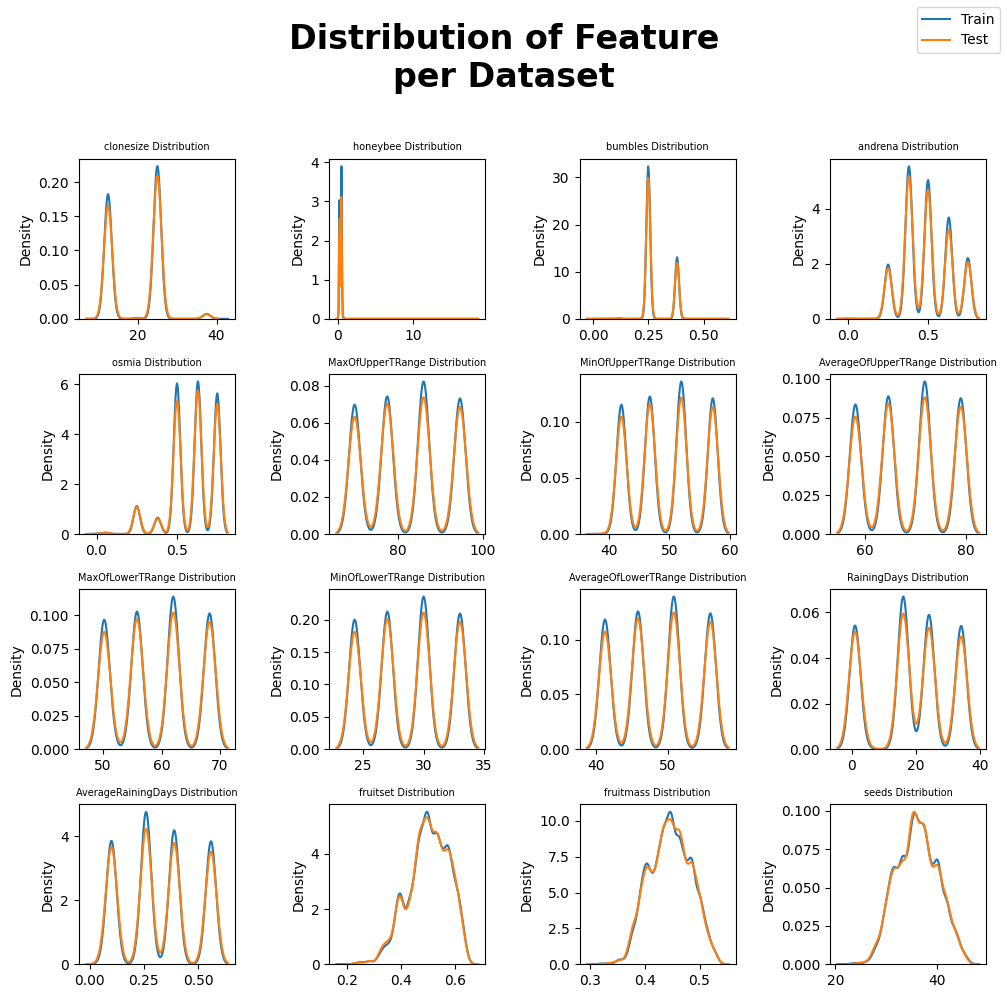

In [8]:
fig, ax = plt.subplots(4, 4, figsize=(10, 10))
ax = ax.flatten()

for i, column in enumerate(sample_df.columns):
    sns.kdeplot(train_df[column], ax=ax[i])    
    sns.kdeplot(sample_df[column], ax=ax[i])
    
    ax[i].set_title(f'{column} Distribution', size=7)
    ax[i].set_xlabel(None)
    
fig.suptitle('Distribution of Feature\nper Dataset\n', fontsize=24, fontweight='bold')
fig.legend(['Train', 'Test'])
plt.tight_layout()

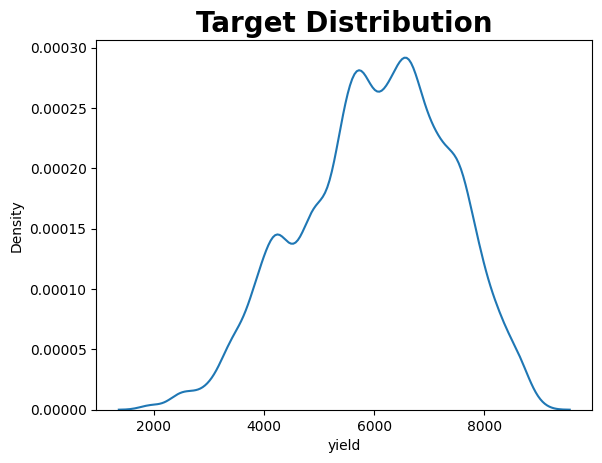

In [9]:
plt.figure()
sns.kdeplot(data=train_df, x=TARGET_COL)
plt.title('Target Distribution', weight='bold', size=20)
plt.show()

## Correlation
### Correlation Matrix

In [10]:
def heatmap(dataset, label=None):
    corr = dataset.corr()
    plt.figure(figsize=(14, 10))
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr, mask=mask, cmap='viridis', annot=True, annot_kws={'size': 7})
    plt.title(f'{label} Dataset Correlation Matrix\n', fontsize=25, weight='bold')
    plt.show()

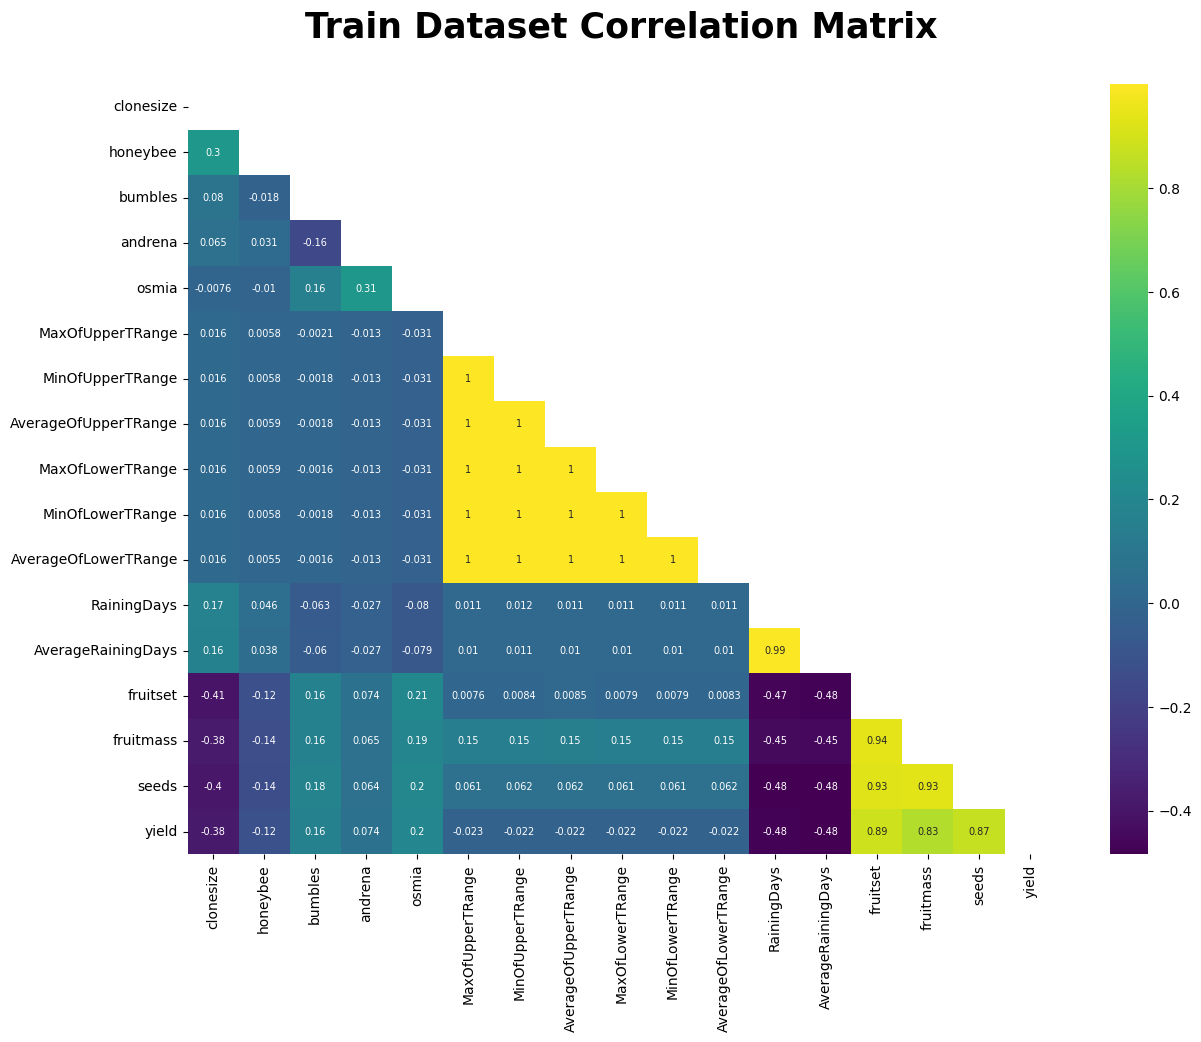

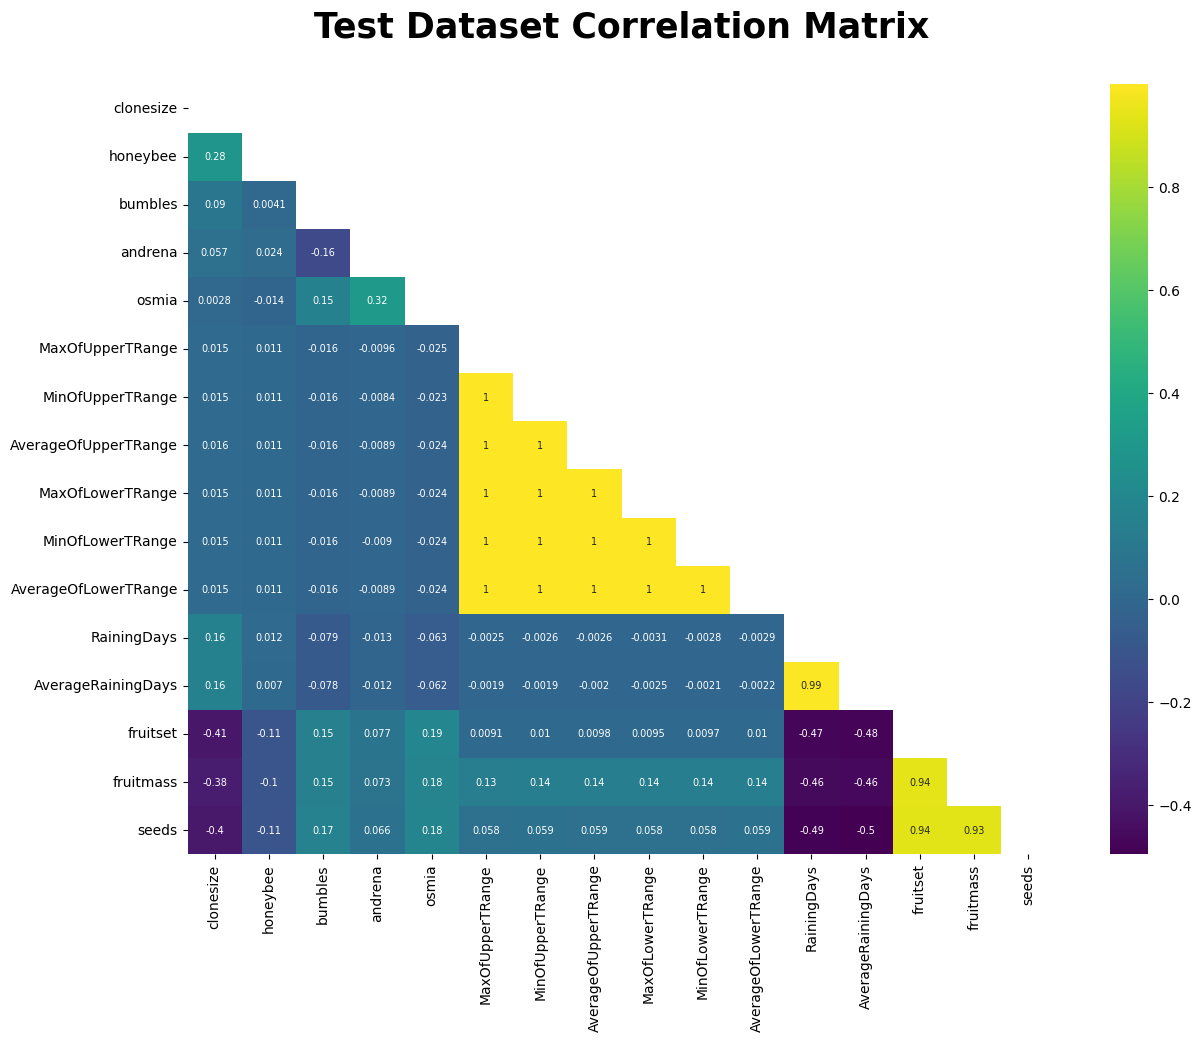

In [11]:
heatmap(train_df, 'Train')
heatmap(sample_df, 'Test')

### Dendrogram

In [12]:
from scipy.cluster.hierarchy import ward, dendrogram

def distance(data, label=''):
    distances = data.corr()
    dist_linkage = ward(distances)
    
    plt.figure(figsize = (10, 8))
    dendro = dendrogram(dist_linkage, labels=data.columns, leaf_rotation=90)
    plt.title(f'Feature Distance in {label} Dataset', weight='bold', size=22)
    plt.show()

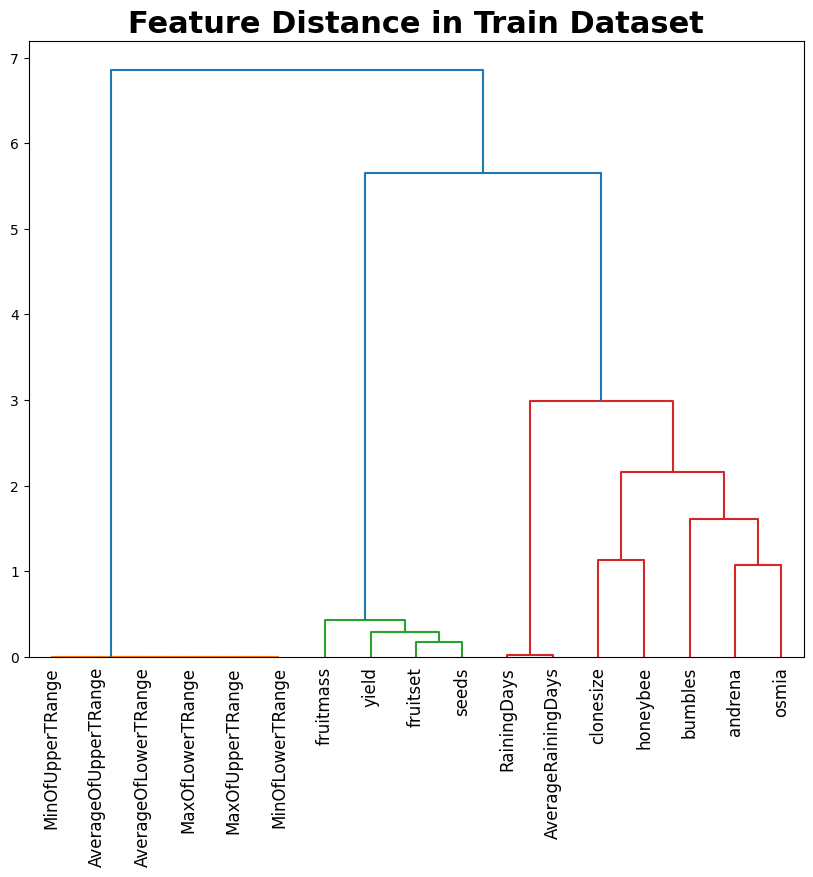

In [13]:
distance(train_df, 'Train')

# Preperation

In [14]:
import optuna
from xgboost import *
from lightgbm import *
from catboost import *
from sklearn.svm import *
from sklearn.metrics import *
from sklearn.ensemble import *
from sklearn.neighbors import *
from sklearn.linear_model import *
from sklearn.model_selection import *
from sklearn.gaussian_process import *
from optuna.samplers import TPESampler
from sklearn.pipeline import make_pipeline

X = train_df.drop_duplicates().copy()
y = X.pop(TARGET_COL)
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=SEED)

SPLITS = 5
kfold = KFold(n_splits=SPLITS, random_state=SEED, shuffle=True)

# Feature Engineering

No feature engineering seems to really improve model performances

# Base Model

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


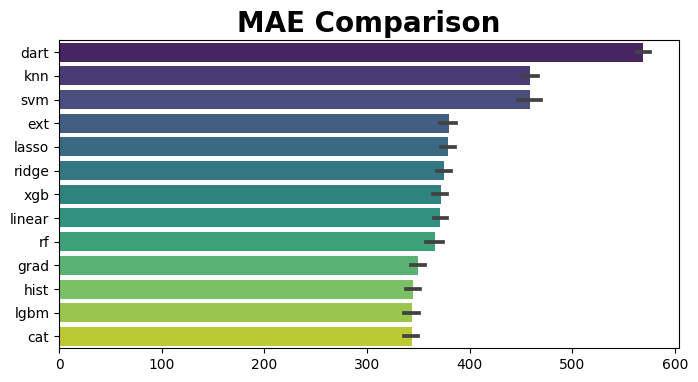

In [15]:
models = {
    'linear': LinearRegression(n_jobs=-1),
    'ridge': Ridge(random_state=SEED),
    'lasso': Lasso(random_state=SEED, max_iter=1000000),
    'svm': LinearSVR(random_state=SEED, max_iter=1000000),
    # 'gauss': GaussianProcessRegressor(random_state=SEED), far worst that the othes
    'ext': ExtraTreesRegressor(n_jobs=-1, random_state=SEED),
    'rf': RandomForestRegressor(n_jobs=-1, random_state=SEED),
    'xgb': XGBRegressor(n_jobs=-1, random_state=SEED, eval_metric='mae'),
    'lgbm': LGBMRegressor(n_jobs=-1, random_state=SEED, objective='mae'),
    'dart': LGBMRegressor(n_jobs=-1, random_state=SEED, boosting_type='dart'),
    'cat': CatBoostRegressor(thread_count=-1, random_state=SEED, objective='MAE', verbose=0),
    'grad': GradientBoostingRegressor(random_state=SEED, loss='absolute_error'),
    'hist': HistGradientBoostingRegressor(random_state=SEED, loss='absolute_error'),
    'knn': KNeighborsRegressor(n_jobs=-1)
}

models_df = pd.DataFrame() # type: ignore

for label, model in models.items():
    models_df[label] = cross_validate(model, X, y, scoring=["neg_mean_absolute_error"])["test_neg_mean_absolute_error"] # type: ignore

plt.figure(figsize = (8, 4))
sns.barplot(data=-models_df.reindex((models_df).mean().sort_values().index, axis=1), palette='viridis', orient="h")
plt.title('MAE Comparison', weight='bold', size=20)
plt.show()

We will focus on LGBM

# LGBM Tunning

In [16]:
import optuna.integration.lightgbm as lgb

params = {
    "objective": "regression_l1",
    "metric": "mae",
    "verbosity": -1,
    "boosting_type": "gbdt",
    'random_state': SEED,
}

dtrain = lgb.Dataset(X, label=y)

tuner = lgb.LightGBMTunerCV(
    params,
    dtrain,
    folds=kfold,
    return_cvbooster=True,
    callbacks=[early_stopping(100), log_evaluation(0)],
)

tuner.run()

print("Best score:", tuner.best_score)
best_params = tuner.best_params
print("Best params:", best_params)
print("  Params: ")
for key, value in best_params.items():
    print("    {}: {}".format(key, value))

[I 2023-05-23 12:53:44,275] A new study created in memory with name: no-name-88421498-3402-4098-bda3-bf5ce78c7609
feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds


feature_fraction, val_score: 342.363313:  14%|#4        | 1/7 [00:12<01:12, 12.01s/it]

Early stopping, best iteration is:
[170]	cv_agg's l1: 342.363 + 4.73637


feature_fraction, val_score: 342.363313:  29%|##8       | 2/7 [00:23<00:59, 11.94s/it]

Early stopping, best iteration is:
[170]	cv_agg's l1: 342.363 + 4.73637


feature_fraction, val_score: 342.363313:  43%|####2     | 3/7 [00:36<00:49, 12.34s/it]

Early stopping, best iteration is:
[170]	cv_agg's l1: 342.363 + 4.73637


feature_fraction, val_score: 342.363313:  57%|#####7    | 4/7 [00:48<00:36, 12.05s/it]

Early stopping, best iteration is:
[170]	cv_agg's l1: 342.363 + 4.73637


feature_fraction, val_score: 342.363313:  71%|#######1  | 5/7 [00:59<00:23, 11.67s/it]

Early stopping, best iteration is:
[170]	cv_agg's l1: 342.363 + 4.73637


feature_fraction, val_score: 342.363313:  86%|########5 | 6/7 [01:10<00:11, 11.39s/it]

Early stopping, best iteration is:
[170]	cv_agg's l1: 342.363 + 4.73637


feature_fraction, val_score: 342.363313: 100%|##########| 7/7 [01:21<00:00, 11.65s/it]


Early stopping, best iteration is:
[170]	cv_agg's l1: 342.363 + 4.73637


num_leaves, val_score: 342.363313:   5%|5         | 1/20 [01:03<20:02, 63.28s/it]

Early stopping, best iteration is:
[170]	cv_agg's l1: 342.363 + 4.73637


num_leaves, val_score: 342.363313:  10%|#         | 2/20 [01:30<12:33, 41.84s/it]

Early stopping, best iteration is:
[170]	cv_agg's l1: 342.363 + 4.73637


num_leaves, val_score: 342.363313:  15%|#5        | 3/20 [02:15<12:17, 43.36s/it]

Early stopping, best iteration is:
[170]	cv_agg's l1: 342.363 + 4.73637


num_leaves, val_score: 342.363313:  20%|##        | 4/20 [02:50<10:42, 40.19s/it]

Early stopping, best iteration is:
[170]	cv_agg's l1: 342.363 + 4.73637


num_leaves, val_score: 342.363313:  25%|##5       | 5/20 [03:12<08:23, 33.54s/it]

Early stopping, best iteration is:
[170]	cv_agg's l1: 342.363 + 4.73637


num_leaves, val_score: 342.363313:  30%|###       | 6/20 [04:17<10:18, 44.19s/it]

Early stopping, best iteration is:
[170]	cv_agg's l1: 342.363 + 4.73637


num_leaves, val_score: 342.363313:  35%|###5      | 7/20 [05:13<10:26, 48.19s/it]

Early stopping, best iteration is:
[170]	cv_agg's l1: 342.363 + 4.73637


num_leaves, val_score: 342.363313:  40%|####      | 8/20 [05:35<07:57, 39.79s/it]

Early stopping, best iteration is:
[170]	cv_agg's l1: 342.363 + 4.73637


num_leaves, val_score: 342.363313:  45%|####5     | 9/20 [06:34<08:22, 45.71s/it]

Early stopping, best iteration is:
[170]	cv_agg's l1: 342.363 + 4.73637


num_leaves, val_score: 342.363313:  50%|#####     | 10/20 [07:25<07:55, 47.52s/it]

Early stopping, best iteration is:
[170]	cv_agg's l1: 342.363 + 4.73637


num_leaves, val_score: 342.363313:  55%|#####5    | 11/20 [08:45<08:35, 57.32s/it]

Early stopping, best iteration is:
[170]	cv_agg's l1: 342.363 + 4.73637


num_leaves, val_score: 342.363313:  60%|######    | 12/20 [08:50<05:32, 41.58s/it]

Early stopping, best iteration is:
[170]	cv_agg's l1: 342.363 + 4.73637


num_leaves, val_score: 342.363313:  65%|######5   | 13/20 [09:05<03:53, 33.37s/it]

Early stopping, best iteration is:
[170]	cv_agg's l1: 342.363 + 4.73637


num_leaves, val_score: 342.363313:  70%|#######   | 14/20 [09:08<02:25, 24.23s/it]

Early stopping, best iteration is:
[170]	cv_agg's l1: 342.363 + 4.73637


num_leaves, val_score: 342.363313:  75%|#######5  | 15/20 [09:26<01:51, 22.22s/it]

Early stopping, best iteration is:
[170]	cv_agg's l1: 342.363 + 4.73637


num_leaves, val_score: 342.363313:  80%|########  | 16/20 [09:41<01:20, 20.04s/it]

Early stopping, best iteration is:
[170]	cv_agg's l1: 342.363 + 4.73637


num_leaves, val_score: 342.363313:  85%|########5 | 17/20 [10:16<01:13, 24.58s/it]

Early stopping, best iteration is:
[170]	cv_agg's l1: 342.363 + 4.73637


num_leaves, val_score: 342.363313:  90%|######### | 18/20 [10:27<00:41, 20.62s/it]

Early stopping, best iteration is:
[170]	cv_agg's l1: 342.363 + 4.73637


num_leaves, val_score: 342.363313:  95%|#########5| 19/20 [10:39<00:18, 18.05s/it]

Early stopping, best iteration is:
[170]	cv_agg's l1: 342.363 + 4.73637


num_leaves, val_score: 342.363313: 100%|##########| 20/20 [11:12<00:00, 33.61s/it]


Early stopping, best iteration is:
[170]	cv_agg's l1: 342.363 + 4.73637


bagging, val_score: 342.363313:  10%|#         | 1/10 [00:12<01:51, 12.36s/it]

Early stopping, best iteration is:
[170]	cv_agg's l1: 342.363 + 4.73637


bagging, val_score: 342.363313:  20%|##        | 2/10 [00:25<01:42, 12.81s/it]

Early stopping, best iteration is:
[170]	cv_agg's l1: 342.363 + 4.73637


bagging, val_score: 342.363313:  30%|###       | 3/10 [00:38<01:28, 12.71s/it]

Early stopping, best iteration is:
[170]	cv_agg's l1: 342.363 + 4.73637


bagging, val_score: 342.363313:  40%|####      | 4/10 [00:51<01:17, 12.99s/it]

Early stopping, best iteration is:
[170]	cv_agg's l1: 342.363 + 4.73637


bagging, val_score: 342.363313:  50%|#####     | 5/10 [01:04<01:05, 13.00s/it]

Early stopping, best iteration is:
[170]	cv_agg's l1: 342.363 + 4.73637


bagging, val_score: 342.363313:  60%|######    | 6/10 [01:18<00:52, 13.23s/it]

Early stopping, best iteration is:
[170]	cv_agg's l1: 342.363 + 4.73637


bagging, val_score: 342.363313:  70%|#######   | 7/10 [01:31<00:39, 13.23s/it]

Early stopping, best iteration is:
[170]	cv_agg's l1: 342.363 + 4.73637


bagging, val_score: 342.363313:  80%|########  | 8/10 [01:45<00:27, 13.57s/it]

Early stopping, best iteration is:
[170]	cv_agg's l1: 342.363 + 4.73637


bagging, val_score: 342.363313:  90%|######### | 9/10 [01:59<00:13, 13.76s/it]

Early stopping, best iteration is:
[170]	cv_agg's l1: 342.363 + 4.73637


bagging, val_score: 342.363313: 100%|##########| 10/10 [02:11<00:00, 13.19s/it]


Early stopping, best iteration is:
[170]	cv_agg's l1: 342.363 + 4.73637


feature_fraction_stage2, val_score: 342.363313:  33%|###3      | 1/3 [00:12<00:24, 12.30s/it]

Early stopping, best iteration is:
[170]	cv_agg's l1: 342.363 + 4.73637


feature_fraction_stage2, val_score: 342.363313:  67%|######6   | 2/3 [00:24<00:12, 12.15s/it]

Early stopping, best iteration is:
[170]	cv_agg's l1: 342.363 + 4.73637


feature_fraction_stage2, val_score: 342.363313: 100%|##########| 3/3 [00:36<00:00, 12.01s/it]


Early stopping, best iteration is:
[170]	cv_agg's l1: 342.363 + 4.73637


regularization_factors, val_score: 342.363313:   5%|5         | 1/20 [00:12<03:48, 12.02s/it]

Early stopping, best iteration is:
[170]	cv_agg's l1: 342.363 + 4.73637


regularization_factors, val_score: 342.363313:  10%|#         | 2/20 [00:24<03:39, 12.21s/it]

Early stopping, best iteration is:
[170]	cv_agg's l1: 342.363 + 4.73637


regularization_factors, val_score: 342.363313:  15%|#5        | 3/20 [00:36<03:29, 12.30s/it]

Early stopping, best iteration is:
[170]	cv_agg's l1: 342.363 + 4.73637


regularization_factors, val_score: 342.363313:  20%|##        | 4/20 [00:49<03:19, 12.46s/it]

Early stopping, best iteration is:
[170]	cv_agg's l1: 342.363 + 4.73637


regularization_factors, val_score: 342.363313:  25%|##5       | 5/20 [01:01<03:02, 12.19s/it]

Early stopping, best iteration is:
[170]	cv_agg's l1: 342.363 + 4.73637


regularization_factors, val_score: 342.363313:  30%|###       | 6/20 [01:14<02:58, 12.73s/it]

Early stopping, best iteration is:
[170]	cv_agg's l1: 342.363 + 4.73637


regularization_factors, val_score: 342.363313:  35%|###5      | 7/20 [01:26<02:41, 12.45s/it]

Early stopping, best iteration is:
[170]	cv_agg's l1: 342.363 + 4.73637


regularization_factors, val_score: 342.363313:  40%|####      | 8/20 [01:38<02:25, 12.16s/it]

Early stopping, best iteration is:
[170]	cv_agg's l1: 342.363 + 4.73637


regularization_factors, val_score: 342.363313:  45%|####5     | 9/20 [01:50<02:13, 12.13s/it]

Early stopping, best iteration is:
[170]	cv_agg's l1: 342.363 + 4.73637


regularization_factors, val_score: 342.363313:  50%|#####     | 10/20 [02:02<02:02, 12.20s/it]

Early stopping, best iteration is:
[170]	cv_agg's l1: 342.363 + 4.73637


regularization_factors, val_score: 342.363313:  55%|#####5    | 11/20 [02:15<01:50, 12.32s/it]

Early stopping, best iteration is:
[170]	cv_agg's l1: 342.363 + 4.73637


regularization_factors, val_score: 341.884513:  60%|######    | 12/20 [02:26<01:35, 11.97s/it]

Early stopping, best iteration is:
[158]	cv_agg's l1: 341.885 + 5.00898


regularization_factors, val_score: 341.884513:  65%|######5   | 13/20 [02:37<01:21, 11.71s/it]

Early stopping, best iteration is:
[158]	cv_agg's l1: 341.885 + 5.00898


regularization_factors, val_score: 341.884513:  70%|#######   | 14/20 [02:50<01:11, 11.95s/it]

Early stopping, best iteration is:
[158]	cv_agg's l1: 341.885 + 5.00898


regularization_factors, val_score: 341.884513:  75%|#######5  | 15/20 [03:01<00:58, 11.79s/it]

Early stopping, best iteration is:
[158]	cv_agg's l1: 341.885 + 5.00898


regularization_factors, val_score: 341.884513:  80%|########  | 16/20 [03:13<00:47, 11.87s/it]

Early stopping, best iteration is:
[158]	cv_agg's l1: 341.885 + 5.00898


regularization_factors, val_score: 341.884513:  85%|########5 | 17/20 [03:24<00:34, 11.64s/it]

Early stopping, best iteration is:
[158]	cv_agg's l1: 341.885 + 5.00898


regularization_factors, val_score: 341.828441:  90%|######### | 18/20 [03:35<00:22, 11.45s/it]

Early stopping, best iteration is:
[151]	cv_agg's l1: 341.828 + 5.19375


regularization_factors, val_score: 341.828441:  95%|#########5| 19/20 [03:47<00:11, 11.38s/it]

Early stopping, best iteration is:
[151]	cv_agg's l1: 341.828 + 5.19375


regularization_factors, val_score: 341.828441: 100%|##########| 20/20 [03:58<00:00, 11.90s/it]


Early stopping, best iteration is:
[151]	cv_agg's l1: 341.828 + 5.19375


min_data_in_leaf, val_score: 341.828441:  20%|##        | 1/5 [00:11<00:45, 11.34s/it]

Early stopping, best iteration is:
[151]	cv_agg's l1: 341.828 + 5.19375


min_data_in_leaf, val_score: 341.828441:  40%|####      | 2/5 [00:22<00:34, 11.47s/it]

Early stopping, best iteration is:
[151]	cv_agg's l1: 341.828 + 5.19375


min_data_in_leaf, val_score: 341.828441:  60%|######    | 3/5 [00:33<00:22, 11.21s/it]

Early stopping, best iteration is:
[151]	cv_agg's l1: 341.828 + 5.19375


min_data_in_leaf, val_score: 341.828441:  80%|########  | 4/5 [00:45<00:11, 11.32s/it]

Early stopping, best iteration is:
[151]	cv_agg's l1: 341.828 + 5.19375


min_data_in_leaf, val_score: 341.828441: 100%|##########| 5/5 [00:57<00:00, 11.56s/it]

Early stopping, best iteration is:
[151]	cv_agg's l1: 341.828 + 5.19375
Best score: 341.8284408928066
Best params: {'objective': 'regression_l1', 'metric': 'l1', 'verbosity': -1, 'boosting_type': 'gbdt', 'random_state': 42, 'feature_pre_filter': False, 'lambda_l1': 0.0028749577074696393, 'lambda_l2': 1.4887455756086843e-06, 'num_leaves': 31, 'feature_fraction': 1.0, 'bagging_fraction': 1.0, 'bagging_freq': 0, 'min_child_samples': 20}
  Params: 
    objective: regression_l1
    metric: l1
    verbosity: -1
    boosting_type: gbdt
    random_state: 42
    feature_pre_filter: False
    lambda_l1: 0.0028749577074696393
    lambda_l2: 1.4887455756086843e-06
    num_leaves: 31
    feature_fraction: 1.0
    bagging_fraction: 1.0
    bagging_freq: 0
    min_child_samples: 20


In [17]:
model = LGBMRegressor(**tuner.best_params)
model.fit(X, y)
preds = model.predict(X_test)
print(mean_absolute_error(y_test, preds))

347.3459185784837


Ploting the prediction distribution vs the real distibution

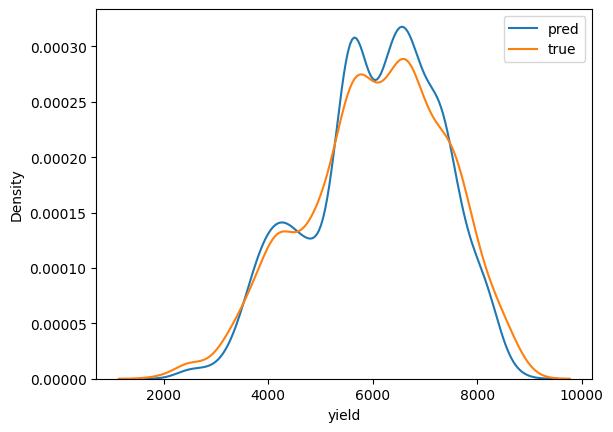

In [18]:
sns.kdeplot(preds)
sns.kdeplot(y_test)
plt.legend(labels=["pred", "true"])

Since they are 776 unique targets we try a little more performance by rounding our predictions to the nearest targets

347.0665616584887


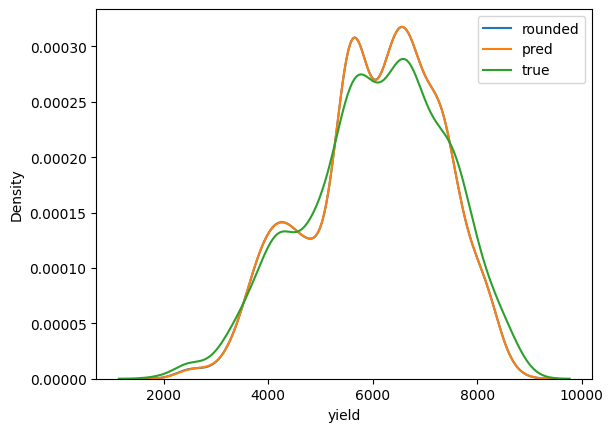

In [19]:
unique_targets = sorted(y_test.unique())

def round_targets(preds):
    return [min(unique_targets, key = lambda x: abs(x - pred)) for pred in preds]

rounded = round_targets(preds)
print(mean_absolute_error(y_test, rounded))
sns.kdeplot(rounded)
sns.kdeplot(preds)
sns.kdeplot(y_test)
plt.legend(labels=["rounded", "pred", "true"])